In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

from sklearn.metrics import normalized_mutual_info_score as NMI
from itertools import combinations 
from sklearn.preprocessing import OneHotEncoder

In [2]:
from ZhongShan import *

Import Data

In [3]:
manip_type = 'RankStandardisedData'

csv_list = os.listdir(f'../data/curated/{manip_type}')
csv_list.sort()

data = pd.DataFrame()
for file in csv_list[1:]:
    if '2022' not in file:
        tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
        data = data.append(tmp)

In [4]:
zhongshan = ZhongShan(data)

Pandas DataFrame readin successful
Reset index successful


In [5]:
zhongshan.fill_na('Full')

Filled null values on Full dataset with 0


In [6]:
zhongshan.one_hot_encode_fit_transform('Brownlow Votes', ['1', '2', '3'])

Successfully fitted OHE on 'Brownlow Votes' column
OHE'ed and Dropped 'Brownlow Votes' column on Full Data
Successfully fitted and OHE transformed Full data's 'Brownlow Votes' column


In [7]:
zhongshan.set_columns(['1', '2', '3'], ['Player'], ['HomeAway'])

Successfully set label columns, consisting 3 columns
Successfully set index columns, consisting 1 columns
Successfully set discarded columns, consisting 1 columns
Successfully set feature columns, consisting 71 columns
Successfully set retained columns, consisting 74 columns


In [8]:
zhongshan.view_setted_columns()

label columns: ['1', '2', '3'] 

index columns: ['Player'] 

discarded columns: ['HomeAway'] 

feature columns: ['Kicks BTRS', 'Kicks OTRS', 'Handballs BTRS', 'Handballs OTRS', 'Disposals BTRS', 'Disposals OTRS', 'Marks BTRS', 'Marks OTRS', 'Goals BTRS', 'Goals OTRS', 'Behinds BTRS', 'Behinds OTRS', 'Tackles BTRS', 'Tackles OTRS', 'Hitouts BTRS', 'Hitouts OTRS', 'Goal Assists BTRS', 'Goal Assists OTRS', 'Inside 50s BTRS', 'Inside 50s OTRS', 'Clearances BTRS', 'Clearances OTRS', 'Clangers BTRS', 'Clangers OTRS', 'Rebound 50s BTRS', 'Rebound 50s OTRS', 'Frees For BTRS', 'Frees For OTRS', 'Frees Agains BTRS', 'Frees Agains OTRS', 'Contested Possessions BTRS', 'Contested Possessions OTRS', 'Uncontested Possessions BTRS', 'Uncontested Possessions OTRS', 'Effective Disposals BTRS', 'Effective Disposals OTRS', 'Contested Marks BTRS', 'Contested Marks OTRS', 'Marks Inside 50 BTRS', 'Marks Inside 50 OTRS', 'One Percenters BTRS', 'One Percenters OTRS', 'Bounces BTRS', 'Bounces OTRS', 'Centre Cle

In [9]:
zhongshan.basic_overview('Full', 10)

,Player,Kicks BTRS,Kicks OTRS,Handballs BTRS,Handballs OTRS,Disposals BTRS,Disposals OTRS,Marks BTRS,Marks OTRS,Goals BTRS,...,Marks Outside 50 OTRS,Tackles Outside 50 BTRS,Tackles Outside 50 OTRS,Behind Assists BTRS,Behind Assists OTRS,Ineffective Disposals BTRS,Ineffective Disposals OTRS,1,2,3
0,Richard Douglas,1.000000,1.000000,0.744186,0.761905,1.000000,1.000000,0.627907,0.428571,0.000000,...,0.571429,0.651163,0.571429,0.883721,0.761905,1.000000,1.000000,1.0,0.0,0.0
1,Rory Sloane,0.837209,0.714286,0.953488,1.000000,0.953488,0.952381,0.767442,0.666667,0.860465,...,0.619048,0.953488,1.000000,0.976744,0.952381,0.674419,0.714286,1.0,0.0,0.0
2,Patrick Dangerfield,0.906977,0.857143,0.860465,0.809524,0.930233,0.904762,0.139535,0.047619,0.883721,...,0.000000,0.813953,0.857143,0.906977,0.809524,0.953488,0.952381,0.0,0.0,1.0
3,Rory Laird,0.860465,0.761905,0.883721,0.857143,0.906977,0.857143,0.837209,0.761905,0.697674,...,0.809524,0.348837,0.238095,0.674419,0.523810,0.418605,0.428571,1.0,0.0,0.0
4,Taylor Walker,0.976744,0.952381,0.046512,0.047619,0.813953,0.761905,1.000000,1.000000,1.000000,...,0.857143,0.000000,0.000000,1.000000,1.000000,0.883721,0.904762,0.0,0.0,0.0
5,Brodie Smith,0.883721,0.809524,0.651163,0.666667,0.837209,0.809524,0.651163,0.476190,0.720930,...,0.666667,0.674419,0.619048,0.813953,0.714286,0.441860,0.476190,1.0,0.0,0.0
6,Eddie Betts,0.930233,0.904762,0.465116,0.476190,0.790698,0.714286,0.953488,0.952381,0.953488,...,0.714286,0.837209,0.904762,0.953488,0.904762,0.813953,0.809524,0.0,1.0,0.0
7,Nathan Van Berlo,0.558140,0.428571,0.511628,0.523810,0.604651,0.619048,0.441860,0.285714,0.023256,...,0.380952,0.860465,0.952381,0.325581,0.142857,0.465116,0.523810,1.0,0.0,0.0
8,Daniel Talia,0.302326,0.142857,0.906977,0.904762,0.627907,0.666667,0.465116,0.333333,0.046512,...,0.428571,0.372093,0.285714,0.348837,0.190476,0.093023,0.095238,1.0,0.0,0.0
9,Kyle Hartigan,0.162791,0.047619,0.930233,0.952381,0.558140,0.571429,0.674419,0.523810,0.069767,...,0.761905,0.023256,0.047619,0.465116,0.380952,0.186047,0.238095,1.0,0.0,0.0


,Player,Kicks BTRS,Kicks OTRS,Handballs BTRS,Handballs OTRS,Disposals BTRS,Disposals OTRS,Marks BTRS,Marks OTRS,Goals BTRS,...,Marks Outside 50 OTRS,Tackles Outside 50 BTRS,Tackles Outside 50 OTRS,Behind Assists BTRS,Behind Assists OTRS,Ineffective Disposals BTRS,Ineffective Disposals OTRS,1,2,3
59149,Jake Kelly,0.395349,0.380952,0.372093,0.285714,0.372093,0.428571,0.511628,0.476190,0.558140,...,0.714286,0.813953,0.809524,0.069767,0.047619,0.069767,0.095238,1.0,0.0,0.0
59150,Darcy Fogarty,0.348837,0.285714,0.395349,0.333333,0.279070,0.333333,0.534884,0.523810,0.837209,...,0.571429,0.162791,0.142857,0.860465,0.952381,0.441860,0.380952,1.0,0.0,0.0
59151,Will Hamill,0.255814,0.190476,0.534884,0.476190,0.302326,0.380952,0.069767,0.142857,0.581395,...,0.142857,0.674419,0.666667,0.302326,0.428571,0.465116,0.428571,1.0,0.0,0.0
59152,Jordon Butts,0.418605,0.428571,0.162791,0.095238,0.209302,0.238095,0.697674,0.857143,0.604651,...,0.904762,0.488372,0.476190,0.093023,0.095238,0.023256,0.000000,1.0,0.0,0.0
59153,Riley Thilthorpe,0.279070,0.238095,0.418605,0.380952,0.232558,0.285714,0.558140,0.571429,0.883721,...,0.238095,0.186047,0.190476,0.744186,0.809524,0.767442,0.714286,1.0,0.0,0.0
59154,Reilly O'Brien,0.162791,0.142857,0.441860,0.428571,0.116279,0.095238,0.162791,0.190476,0.627907,...,0.285714,0.930233,0.952381,0.023256,0.000000,0.604651,0.571429,1.0,0.0,0.0
59155,Shane McAdam,0.372093,0.333333,0.186047,0.142857,0.139535,0.142857,0.720930,0.904762,0.976744,...,0.333333,0.209302,0.238095,0.883721,1.000000,0.488372,0.476190,1.0,0.0,0.0
59156,Sam Berry,0.093023,0.047619,0.558140,0.523810,0.162791,0.190476,0.302326,0.285714,0.906977,...,0.380952,0.697674,0.714286,0.627907,0.714286,0.093023,0.142857,1.0,0.0,0.0
59157,Ronin O'Connor,0.000000,0.000000,0.604651,0.619048,0.093023,0.047619,0.000000,0.000000,0.651163,...,0.000000,1.000000,1.000000,0.116279,0.142857,0.255814,0.238095,1.0,0.0,0.0
59158,Billy Frampton,0.116279,0.095238,0.046512,0.000000,0.023256,0.000000,0.325581,0.333333,0.674419,...,0.428571,0.232558,0.285714,0.139535,0.190476,0.279070,0.285714,1.0,0.0,0.0


Number of Rows (Instances*): 59159
Number of Columns (Features*): 76


In [10]:
zhongshan.get_full_data_analysis()

Got Full Data Analysis


In [11]:
zhongshan.view_column_types()

numeric columns: ['Kicks BTRS', 'Kicks OTRS', 'Handballs BTRS', 'Handballs OTRS', 'Disposals BTRS', 'Disposals OTRS', 'Marks BTRS', 'Marks OTRS', 'Goals BTRS', 'Goals OTRS', 'Behinds BTRS', 'Behinds OTRS', 'Tackles BTRS', 'Tackles OTRS', 'Hitouts BTRS', 'Hitouts OTRS', 'Goal Assists BTRS', 'Goal Assists OTRS', 'Inside 50s BTRS', 'Inside 50s OTRS', 'Clearances BTRS', 'Clearances OTRS', 'Clangers BTRS', 'Clangers OTRS', 'Rebound 50s BTRS', 'Rebound 50s OTRS', 'Frees For BTRS', 'Frees For OTRS', 'Frees Agains BTRS', 'Frees Agains OTRS', 'Contested Possessions BTRS', 'Contested Possessions OTRS', 'Uncontested Possessions BTRS', 'Uncontested Possessions OTRS', 'Effective Disposals BTRS', 'Effective Disposals OTRS', 'Contested Marks BTRS', 'Contested Marks OTRS', 'Marks Inside 50 BTRS', 'Marks Inside 50 OTRS', 'One Percenters BTRS', 'One Percenters OTRS', 'Bounces BTRS', 'Bounces OTRS', 'Centre Clearances BTRS', 'Centre Clearances OTRS', 'Stoppage Clearances BTRS', 'Stoppage Clearances OTRS'

In [12]:
zhongshan.view_full_data_analysis()

,Number of Missing,mean,std,min,q1,q2,q3,max,IQR,1.5 upper bound,1.5 lower bound,3 upper bound,3 lower bound,number of 1.5 outliers,number of 3 outliers
Kicks BTRS,0,0.500000,0.295292,0.0,0.250000,0.5,0.750000,1.0,0.50000,1.500000,-0.500000,2.250000,-1.250000,0,0
Kicks OTRS,0,0.500000,0.302065,0.0,0.238095,0.5,0.761905,1.0,0.52381,1.547619,-0.547619,2.333333,-1.333333,0,0
Handballs BTRS,0,0.500000,0.295292,0.0,0.250000,0.5,0.750000,1.0,0.50000,1.500000,-0.500000,2.250000,-1.250000,0,0
Handballs OTRS,0,0.500000,0.302065,0.0,0.238095,0.5,0.761905,1.0,0.52381,1.547619,-0.547619,2.333333,-1.333333,0,0
Disposals BTRS,0,0.500000,0.295292,0.0,0.250000,0.5,0.750000,1.0,0.50000,1.500000,-0.500000,2.250000,-1.250000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTRS,0,0.500000,0.295292,0.0,0.250000,0.5,0.750000,1.0,0.50000,1.500000,-0.500000,2.250000,-1.250000,0,0
Ineffective Disposals OTRS,0,0.500000,0.302065,0.0,0.238095,0.5,0.761905,1.0,0.52381,1.547619,-0.547619,2.333333,-1.333333,0,0
1,0,0.932048,0.251666,0.0,1.000000,1.0,1.000000,1.0,0.00000,1.000000,1.000000,1.000000,1.000000,4020,4020
2,0,0.022651,0.148789,0.0,0.000000,0.0,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,1340,1340


In [13]:
# zhongshan.view_all_full_data_col_analysis()

Train Validate Test Split

In [14]:
from sklearn.model_selection import train_test_split

train_test_split_game_list = [game for game in csv_list[1:] if '2022' not in game]

train_games, val_test_games = train_test_split(train_test_split_game_list, train_size = 0.7, test_size = 0.3, random_state = 18661112)
val_games, test_games = train_test_split(val_test_games, train_size = 0.5, test_size = 0.5, random_state = 18661112)

train_data = pd.DataFrame()
for file in train_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    train_data = train_data.append(tmp)

val_data = pd.DataFrame()
for file in val_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    val_data = val_data.append(tmp)

test_data = pd.DataFrame()
for file in test_games:
    tmp = pd.read_csv(f'../data/curated/{manip_type}/{file}')
    test_data = test_data.append(tmp)

In [15]:
zhongshan.read_in_train_test_split(train_data, val_data, test_data)

Train Data read in successfully
Validation Data read in successfully
Test Data read in successfully


In [16]:
zhongshan.fill_na('Train')
zhongshan.fill_na('Validate')
zhongshan.fill_na('Test')

Filled null values on Train dataset with 0
Filled null values on Validate dataset with 0
Filled null values on Test dataset with 0


In [17]:
zhongshan.one_hot_encode_transform('Train', 'Brownlow Votes')
zhongshan.one_hot_encode_transform('Validate', 'Brownlow Votes')
zhongshan.one_hot_encode_transform('Test', 'Brownlow Votes')

OHE'ed and Dropped 'Brownlow Votes' column on Train Data
OHE'ed and Dropped 'Brownlow Votes' column on Validate Data
OHE'ed and Dropped 'Brownlow Votes' column on Test Data


In [18]:
zhongshan.pca_fit()

PCA successfully fitted on training data


In [19]:
zhongshan.view_pca_explained_variance_ratio()

PCA Explained Variance


,explained_variance_ratio
0,0.239850
1,0.135212
2,0.085164
3,0.053139
4,0.043414
5,0.040378
6,0.038168
7,0.034636
8,0.032792
9,0.025633


In [20]:
zhongshan.pca_set_final_ncomponents(2)

Using first 2 PCA components


In [21]:
zhongshan.pca_transform_all()

PCA transformed Full Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Train Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Validate Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns
PCA transformed Test Data, PLEASE REMEMBER TO USE .pca_update_features() to update feature_columns


In [22]:
zhongshan.pca_update_features()

Updated feature columns and retained columns


In [23]:
zhongshan.get_abs_corr()

Calculated correlation and absolute correlation matrix on Train data


In [24]:
zhongshan.view_corr_matrix()

,Kicks BTRS,Kicks OTRS,Handballs BTRS,Handballs OTRS,Disposals BTRS,Disposals OTRS,Marks BTRS,Marks OTRS,Goals BTRS,Goals OTRS,...,Marks Outside 50 OTRS,Tackles Outside 50 BTRS,Tackles Outside 50 OTRS,Behind Assists BTRS,Behind Assists OTRS,Ineffective Disposals BTRS,Ineffective Disposals OTRS,1,2,3
Kicks BTRS,1.000000,0.972415,0.231607,0.188093,0.790109,0.767450,0.485101,0.415094,-0.110919,-0.331298,...,0.413012,0.099461,0.029456,0.338331,0.267096,0.532322,0.493670,-0.292095,0.149071,0.161368
Kicks OTRS,0.972415,1.000000,0.194260,0.159013,0.750072,0.756347,0.451547,0.421189,-0.131880,-0.323863,...,0.417053,0.086760,0.022917,0.294279,0.263134,0.519998,0.489004,-0.272941,0.137564,0.151137
Handballs BTRS,0.231607,0.194260,1.000000,0.969158,0.727023,0.704398,0.009274,-0.048270,-0.214899,-0.406504,...,0.024976,0.263865,0.207476,0.279842,0.220880,0.414148,0.373357,-0.218712,0.102931,0.124297
Handballs OTRS,0.188093,0.159013,0.969158,1.000000,0.680875,0.687501,-0.019863,-0.065048,-0.236829,-0.400760,...,0.009447,0.261025,0.210153,0.243022,0.216426,0.392031,0.362465,-0.205967,0.094751,0.117108
Disposals BTRS,0.790109,0.750072,0.727023,0.680875,1.000000,0.972757,0.321887,0.242898,-0.236733,-0.490137,...,0.289080,0.217196,0.140374,0.381087,0.298783,0.601238,0.551884,-0.317609,0.161076,0.177084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTRS,0.532322,0.519998,0.414148,0.392031,0.601238,0.596782,0.082751,0.039971,-0.032561,-0.216104,...,-0.003341,0.189401,0.137657,0.325455,0.297357,1.000000,0.978340,-0.225955,0.111155,0.125396
Ineffective Disposals OTRS,0.493670,0.489004,0.373357,0.362465,0.551884,0.554398,0.056591,0.022481,-0.051121,-0.191234,...,-0.025630,0.174885,0.135086,0.304828,0.289810,0.978340,1.000000,-0.217277,0.106071,0.121322
1,-0.292095,-0.272941,-0.218712,-0.205967,-0.317609,-0.304094,-0.134843,-0.100076,-0.090774,-0.020912,...,-0.052567,-0.098329,-0.081072,-0.278036,-0.237854,-0.225955,-0.217277,1.000000,-0.563813,-0.563813
2,0.149071,0.137564,0.102931,0.094751,0.161076,0.152318,0.070418,0.051508,0.033783,-0.005633,...,0.032510,0.046027,0.036410,0.134438,0.109755,0.111155,0.106071,-0.563813,1.000000,-0.023172


In [25]:
zhongshan.view_abs_corr_matrix()

,Kicks BTRS,Kicks OTRS,Handballs BTRS,Handballs OTRS,Disposals BTRS,Disposals OTRS,Marks BTRS,Marks OTRS,Goals BTRS,Goals OTRS,...,Marks Outside 50 OTRS,Tackles Outside 50 BTRS,Tackles Outside 50 OTRS,Behind Assists BTRS,Behind Assists OTRS,Ineffective Disposals BTRS,Ineffective Disposals OTRS,1,2,3
Kicks BTRS,1.000000,0.972415,0.231607,0.188093,0.790109,0.767450,0.485101,0.415094,0.110919,0.331298,...,0.413012,0.099461,0.029456,0.338331,0.267096,0.532322,0.493670,0.292095,0.149071,0.161368
Kicks OTRS,0.972415,1.000000,0.194260,0.159013,0.750072,0.756347,0.451547,0.421189,0.131880,0.323863,...,0.417053,0.086760,0.022917,0.294279,0.263134,0.519998,0.489004,0.272941,0.137564,0.151137
Handballs BTRS,0.231607,0.194260,1.000000,0.969158,0.727023,0.704398,0.009274,0.048270,0.214899,0.406504,...,0.024976,0.263865,0.207476,0.279842,0.220880,0.414148,0.373357,0.218712,0.102931,0.124297
Handballs OTRS,0.188093,0.159013,0.969158,1.000000,0.680875,0.687501,0.019863,0.065048,0.236829,0.400760,...,0.009447,0.261025,0.210153,0.243022,0.216426,0.392031,0.362465,0.205967,0.094751,0.117108
Disposals BTRS,0.790109,0.750072,0.727023,0.680875,1.000000,0.972757,0.321887,0.242898,0.236733,0.490137,...,0.289080,0.217196,0.140374,0.381087,0.298783,0.601238,0.551884,0.317609,0.161076,0.177084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTRS,0.532322,0.519998,0.414148,0.392031,0.601238,0.596782,0.082751,0.039971,0.032561,0.216104,...,0.003341,0.189401,0.137657,0.325455,0.297357,1.000000,0.978340,0.225955,0.111155,0.125396
Ineffective Disposals OTRS,0.493670,0.489004,0.373357,0.362465,0.551884,0.554398,0.056591,0.022481,0.051121,0.191234,...,0.025630,0.174885,0.135086,0.304828,0.289810,0.978340,1.000000,0.217277,0.106071,0.121322
1,0.292095,0.272941,0.218712,0.205967,0.317609,0.304094,0.134843,0.100076,0.090774,0.020912,...,0.052567,0.098329,0.081072,0.278036,0.237854,0.225955,0.217277,1.000000,0.563813,0.563813
2,0.149071,0.137564,0.102931,0.094751,0.161076,0.152318,0.070418,0.051508,0.033783,0.005633,...,0.032510,0.046027,0.036410,0.134438,0.109755,0.111155,0.106071,0.563813,1.000000,0.023172


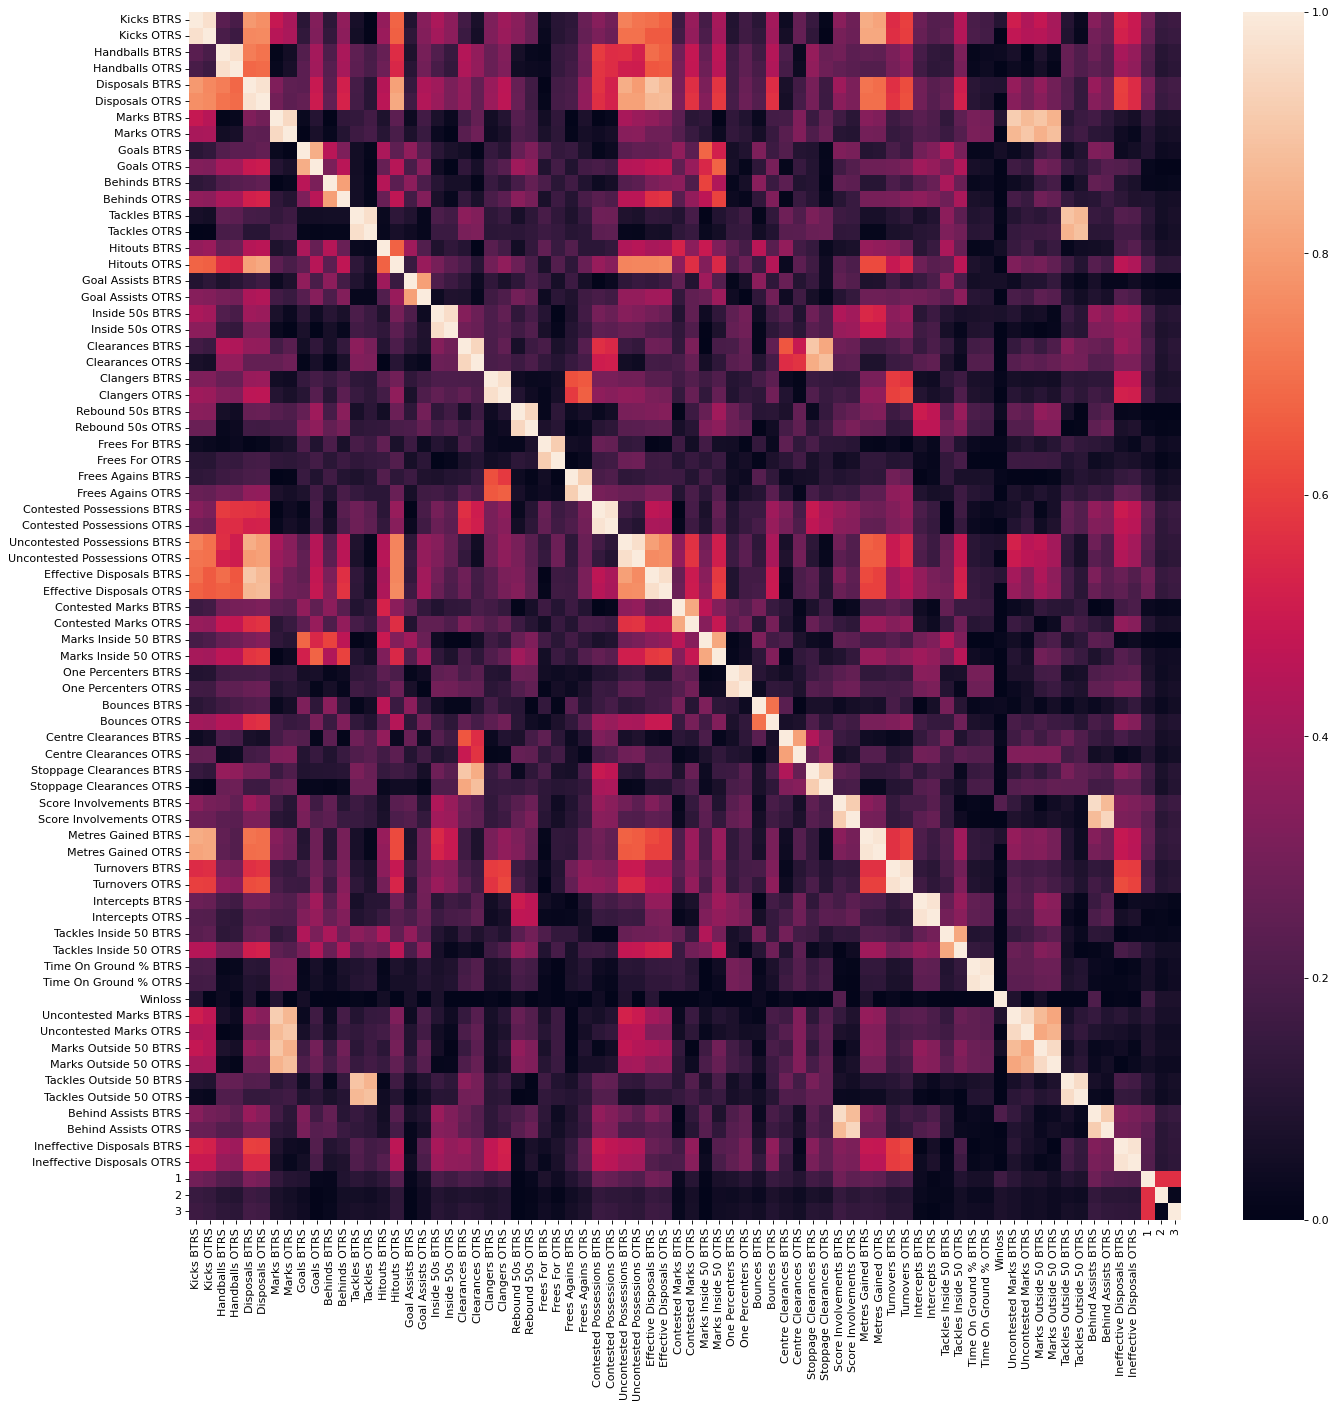

In [26]:
zhongshan.get_corr_heatmap()

In [27]:
zhongshan.view_top_corr()

Correlation between features and 1


,index,1
0,1,1.000000
1,2,0.563813
2,3,0.563813
3,Disposals BTRS,0.317609
4,Disposals OTRS,0.304094
5,Effective Disposals BTRS,0.294316
6,Kicks BTRS,0.292095
7,Score Involvements BTRS,0.286254
8,Contested Possessions BTRS,0.278056
9,Behind Assists BTRS,0.278036


Correlation between features and 2


,index,2
0,2,1.000000
1,1,0.563813
2,Disposals BTRS,0.161076
3,Disposals OTRS,0.152318
4,Kicks BTRS,0.149071
5,Effective Disposals BTRS,0.147930
6,Kicks OTRS,0.137564
7,Score Involvements BTRS,0.137460
8,Behind Assists BTRS,0.134438
9,Contested Possessions BTRS,0.133878


Correlation between features and 3


,index,3
0,3,1.000000
1,1,0.563813
2,Disposals BTRS,0.177084
3,Disposals OTRS,0.170212
4,Effective Disposals BTRS,0.163794
5,Kicks BTRS,0.161368
6,Score Involvements BTRS,0.157193
7,Contested Possessions BTRS,0.155617
8,Effective Disposals OTRS,0.153812
9,Behind Assists BTRS,0.152341


In [28]:
zhongshan.get_nmi()

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for t

In [29]:
zhongshan.view_nmi_matrix()

,Kicks BTRS,Kicks OTRS,Handballs BTRS,Handballs OTRS,Disposals BTRS,Disposals OTRS,Marks BTRS,Marks OTRS,Goals BTRS,Goals OTRS,...,Marks Outside 50 OTRS,Tackles Outside 50 BTRS,Tackles Outside 50 OTRS,Behind Assists BTRS,Behind Assists OTRS,Ineffective Disposals BTRS,Ineffective Disposals OTRS,1,2,3
Kicks BTRS,1.000000,0.437733,0.122232,0.071951,0.232277,0.183675,0.151250,0.094273,0.147035,0.116620,...,0.092325,0.117618,0.068172,0.130873,0.077003,0.156475,0.105496,0.023442,0.006450,0.007685
Kicks OTRS,0.437733,1.000000,0.070685,0.078620,0.176100,0.204741,0.099898,0.107787,0.099190,0.127145,...,0.105190,0.068811,0.076727,0.079172,0.085907,0.109420,0.117516,0.024238,0.006442,0.007903
Handballs BTRS,0.122232,0.070685,1.000000,0.425547,0.210732,0.162098,0.115487,0.066072,0.139945,0.109123,...,0.065935,0.124878,0.074751,0.126360,0.073780,0.139713,0.088302,0.016503,0.003941,0.005449
Handballs OTRS,0.071951,0.078620,0.425547,1.000000,0.153362,0.177864,0.065681,0.074327,0.093297,0.120873,...,0.073790,0.077575,0.083754,0.075746,0.082510,0.090787,0.098811,0.017014,0.003649,0.005475
Disposals BTRS,0.232277,0.176100,0.210732,0.153362,1.000000,0.439989,0.132978,0.078216,0.195885,0.201893,...,0.080725,0.123814,0.073914,0.136077,0.080119,0.172643,0.118265,0.033609,0.008344,0.010347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ineffective Disposals BTRS,0.156475,0.109420,0.139713,0.090787,0.172643,0.127949,0.115935,0.066283,0.130068,0.090517,...,0.065077,0.120671,0.070678,0.127823,0.077852,1.000000,0.463061,0.014466,0.003924,0.004770
Ineffective Disposals OTRS,0.105496,0.117516,0.088302,0.098811,0.118265,0.134776,0.066053,0.073430,0.079644,0.097924,...,0.073207,0.071785,0.078875,0.078454,0.086339,0.463061,1.000000,0.015522,0.003871,0.005077
1,0.023442,0.024238,0.016503,0.017014,0.033609,0.036371,0.005506,0.003546,0.015655,0.019798,...,0.001228,0.004362,0.003735,0.022073,0.018426,0.014466,0.015522,1.000000,0.364280,0.364280
2,0.006450,0.006442,0.003941,0.003649,0.008344,0.008681,0.002189,0.001286,0.004686,0.006101,...,0.000678,0.001774,0.000977,0.005343,0.003954,0.003924,0.003871,0.364280,1.000000,0.004852


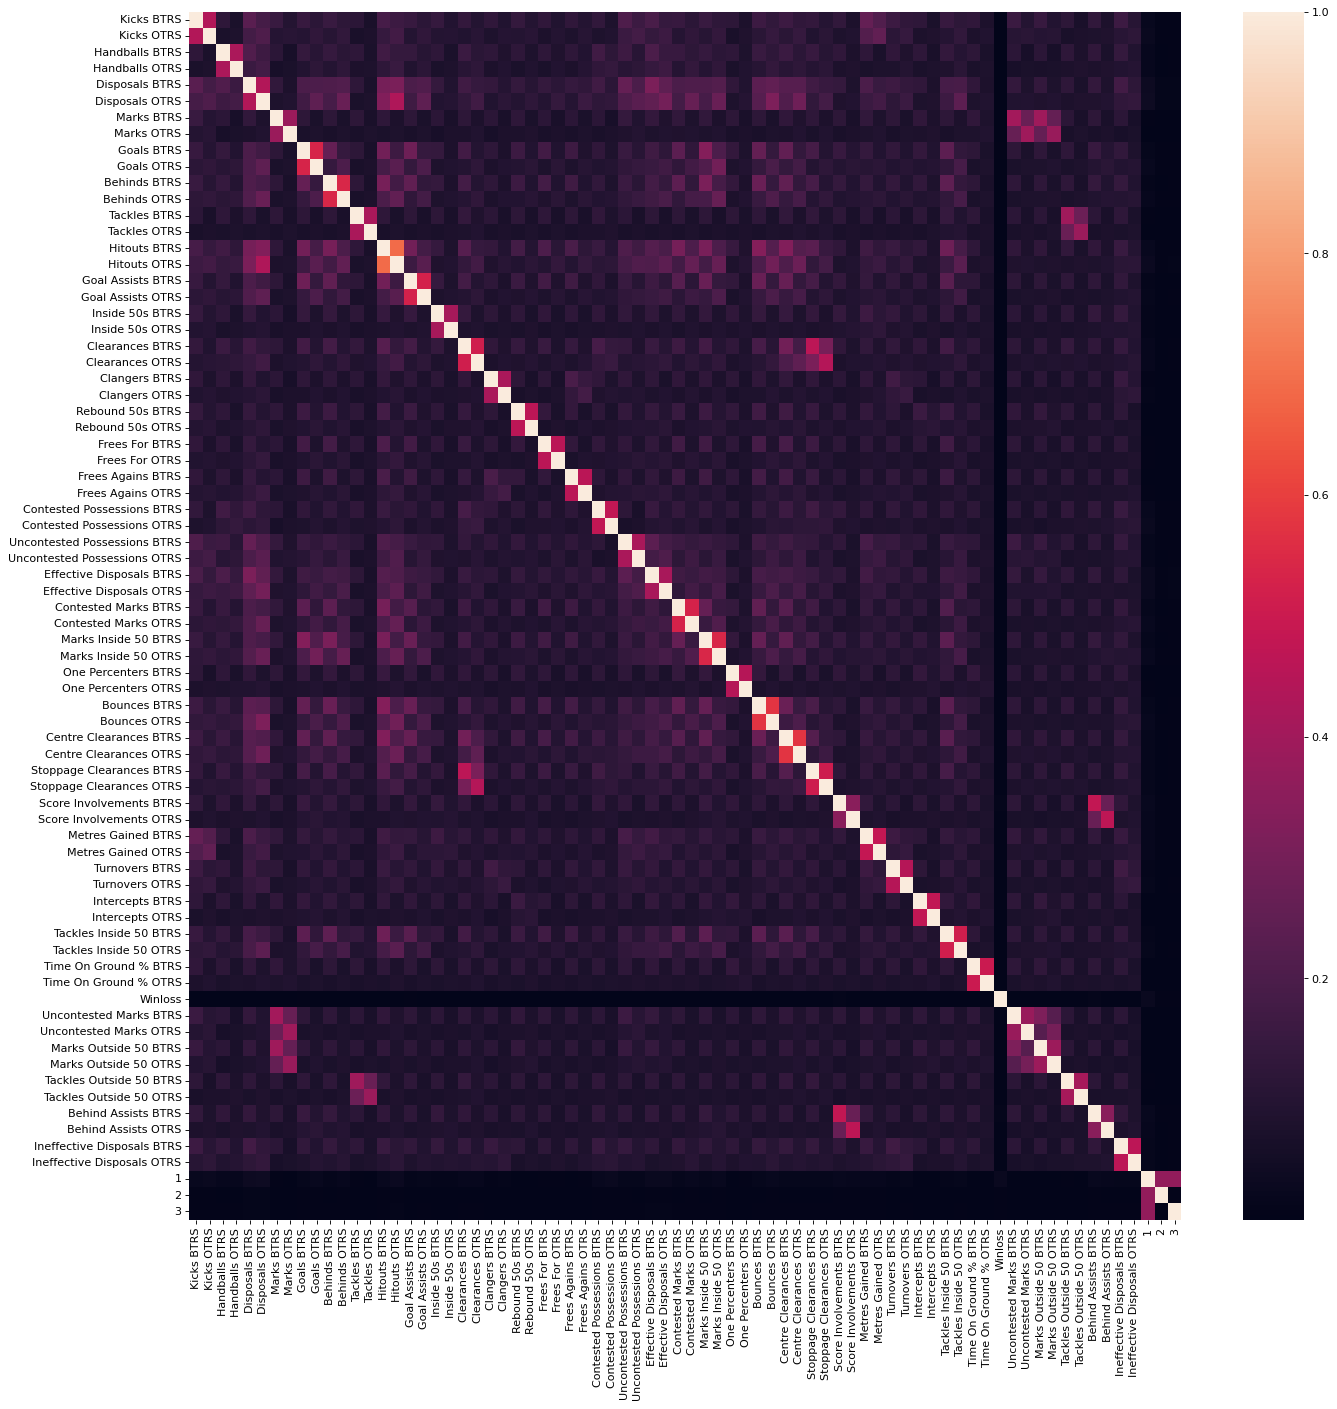

In [30]:
zhongshan.get_nmi_heatmap()

In [31]:
zhongshan.view_top_nmi()

NMI between features and 1


,index,1
0,1,1.000000
1,3,0.364280
2,2,0.364280
3,Disposals OTRS,0.036371
4,Disposals BTRS,0.033609
5,Hitouts OTRS,0.030848
6,Winloss,0.026619
7,Effective Disposals OTRS,0.026497
8,Effective Disposals BTRS,0.026282
9,Kicks OTRS,0.024238


NMI between features and 2


,index,2
0,2,1.000000
1,1,0.364280
2,Disposals OTRS,0.008681
3,Disposals BTRS,0.008344
4,Hitouts OTRS,0.007324
5,Effective Disposals BTRS,0.006842
6,Kicks BTRS,0.006450
7,Kicks OTRS,0.006442
8,Winloss,0.006430
9,Effective Disposals OTRS,0.006183


NMI between features and 3


,index,3
0,3,1.000000
1,1,0.364280
2,Disposals OTRS,0.011245
3,Disposals BTRS,0.010347
4,Hitouts OTRS,0.009735
5,Effective Disposals OTRS,0.008553
6,Effective Disposals BTRS,0.008286
7,Kicks OTRS,0.007903
8,Contested Possessions OTRS,0.007702
9,Kicks BTRS,0.007685


In [32]:
# zhongshan.view_all_feature_label_analysis(scatter_type='categorical')

In [33]:
zhongshan.feature_selection(0.1)

Read in feature selection cutoff value at 0.1


In [34]:
zhongshan.get_selected_features()

Successfully got selected features


In [35]:
zhongshan.get_feature_selected_data()

In [36]:
create_directories(['../data/curated/modelling'])

In [37]:
zhongshan.export_data('Full', '1', '../data/curated/modelling/RS_Full_1.csv')
zhongshan.export_data('Train', '1', '../data/curated/modelling/RS_Train_1.csv')
zhongshan.export_data('Validate', '1', '../data/curated/modelling/RS_Validate_1.csv')
zhongshan.export_data('Test', '1', '../data/curated/modelling/RS_Test_1.csv')
zhongshan.export_data('Full', '2', '../data/curated/modelling/RS_Full_2.csv')
zhongshan.export_data('Train', '2', '../data/curated/modelling/RS_Train_2.csv')
zhongshan.export_data('Validate', '2', '../data/curated/modelling/RS_Validate_2.csv')
zhongshan.export_data('Test', '2', '../data/curated/modelling/RS_Test_2.csv')
zhongshan.export_data('Full', '3', '../data/curated/modelling/RS_Full_3.csv')
zhongshan.export_data('Train', '3', '../data/curated/modelling/RS_Train_3.csv')
zhongshan.export_data('Validate', '3', '../data/curated/modelling/RS_Validate_3.csv')
zhongshan.export_data('Test', '3', '../data/curated/modelling/RS_Test_3.csv')

In [38]:
sanmin = SanMin(zhongshan, 'ZhongShan')

In [39]:
sanmin.export_SanMin('../models/AFL_pipeline_RS')

In [40]:
zhongshan.export_SanMin_components('../models/AFL_pipeline_RS_components')